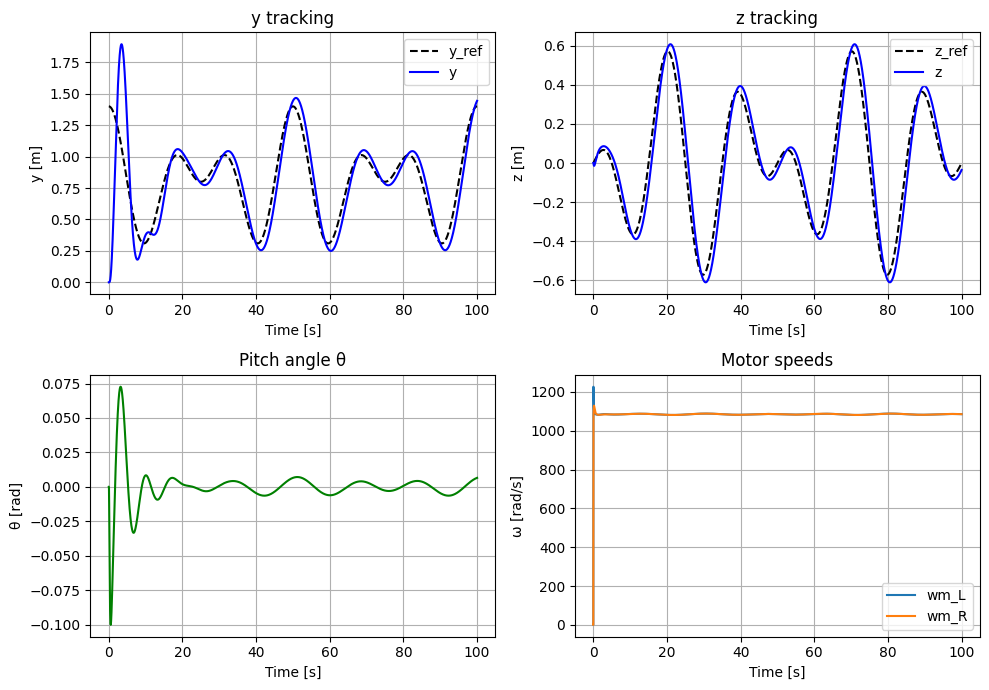

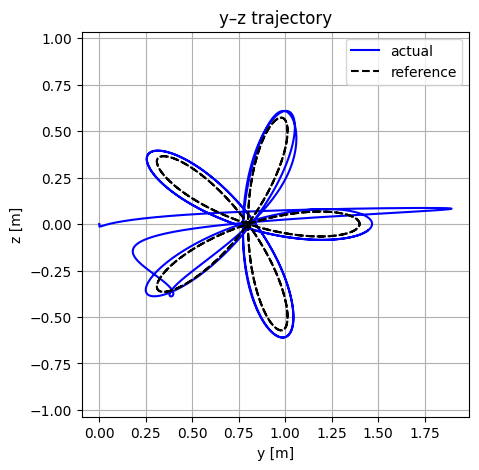

In [5]:
# run_drone_sim.py
import numpy as np
import matplotlib.pyplot as plt

# Import from drone_model_jax.py
from drone_model_jax import (
    evalf_np,          # x' = f(x,p,u) (numpy version)
    get_default_params,
    pack_params,
    N_STATES,
    IDX,
)

# ----- Simulation settings -----
dt = 1e-4          # same as MATLAB
T  = 20            # total simulation time [s]
N  = int(np.round(T / dt)) + 1
t  = np.arange(N) * dt

# Initial state
x = np.zeros((N_STATES, 1), dtype=np.float64)
X = np.zeros((N_STATES, N), dtype=np.float64)
X[:, [0]] = x

# Parameters
p = get_default_params()
p_tuple = pack_params(p)

# Reference trajectories (modify as needed)
def y_ref_func(tt): return 0.8
def z_ref_func(tt): return 0.0

# ----- Simple explicit Euler integration -----
for k in range(N - 1):
    u = np.array([y_ref_func(t[k]), z_ref_func(t[k])], dtype=np.float64)
    dx = evalf_np(X[:, [k]], p_tuple, u)   # (N_STATES,1)
    X[:, [k+1]] = X[:, [k]] + dt * dx

# ----- Plot results -----
iy, iz, ith = IDX['y'], IDX['z'], IDX['theta']
iwl, iwr = IDX['wm_L'], IDX['wm_R']

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# y tracking
axs[0,0].plot(t, [y_ref_func(tt) for tt in t], 'k--', label='y_ref')
axs[0,0].plot(t, X[iy], 'b-', label='y')
axs[0,0].set_title('y tracking'); axs[0,0].set_xlabel('Time [s]'); axs[0,0].set_ylabel('y [m]')
axs[0,0].grid(True); axs[0,0].legend(loc='best')

# z tracking
axs[0,1].plot(t, [z_ref_func(tt) for tt in t], 'k--', label='z_ref')
axs[0,1].plot(t, X[iz], 'b-', label='z')
axs[0,1].set_title('z tracking'); axs[0,1].set_xlabel('Time [s]'); axs[0,1].set_ylabel('z [m]')
axs[0,1].grid(True); axs[0,1].legend(loc='best')

# pitch angle
axs[1,0].plot(t, X[ith], 'g-')
axs[1,0].set_title('Pitch angle θ'); axs[1,0].set_xlabel('Time [s]'); axs[1,0].set_ylabel('θ [rad]')
axs[1,0].grid(True)

# motor speeds
axs[1,1].plot(t, X[iwl], label='wm_L')
axs[1,1].plot(t, X[iwr], label='wm_R')
axs[1,1].set_title('Motor speeds'); axs[1,1].set_xlabel('Time [s]'); axs[1,1].set_ylabel('ω [rad/s]')
axs[1,1].grid(True); axs[1,1].legend(loc='best')

plt.tight_layout()
plt.show()

# (Optional) y–z trajectory
plt.figure(figsize=(5,5))
plt.plot(X[iy], X[iz], 'b-', label='actual')
plt.plot([y_ref_func(tt) for tt in t], [z_ref_func(tt) for tt in t], 'k--', label='reference')
plt.xlabel('y [m]'); plt.ylabel('z [m]')
plt.title('y–z trajectory'); plt.grid(True); plt.axis('equal'); plt.legend(loc='best')
plt.show()
